# Receive Renovar API Data

## Constants and imports

### Imports

In [1]:
from SensorData import SensorData
from GetSensorDataService import GetSensorDataService
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Sensors IDs

In [2]:
TEMPERATURE_ID     =  130
PRESSURE_ID        =  131
ALPHA_CO_ID        =  132
ALPHA_NO2_ID       =  133
ALPHA_SO2_1_ID     =  134
ALPHA_OX_1_ID      =  135
ALPHA_OX_2_ID      =  136
ALPHA_SO2_2_ID     =  137
EXT_TEMPERATURE_ID =  138
EXT_HUMIDITY_ID    =  139
PM10_ID            =  140
PM25_ID            =  141
PM01_ID            =  142
OPC_TEMPERATURE_ID =  143
OPC_HUMIDITY_ID    =  144

### API Constants

In [3]:
HOST = "renovar.lcqar.ufsc.br"
PORT = 8080
GET_SAMPLES_BY_SENSOR = "/sample/sensor/all/"
HTTP_REQUEST_MAIN = 'http://' + HOST + ':' + str(PORT) + GET_SAMPLES_BY_SENSOR

# Sensor chamber Temperature Data

In [4]:
get_sensor_data_service = GetSensorDataService(HOST, PORT, GET_SAMPLES_BY_SENSOR)
sensor_data = get_sensor_data_service.get_data_from_file("data/raw-data-monit-fix-2022-2023-Diamante/INT_TMP.CSV",
                                                         sensor_name='chamber_temp')
sensor_data.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/GetSensorDataService.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DateTime'] = (pd.to_datetime(df[date_time_col], infer_datetime_format=False, format='%d/%m/%Y/%H/%M/%S'))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,29.55,2022-11-21 10:49:21
1,-28.456899,-48.972999,30.14,2022-11-21 11:05:08
2,-28.456899,-48.972999,30.61,2022-11-21 11:20:55
3,-28.456899,-48.972999,30.82,2022-11-21 11:36:41
4,-28.456899,-48.972999,30.99,2022-11-21 11:52:19


In [6]:
chamber_temp_data = SensorData(TEMPERATURE_ID, sensor_name='chamber_temp', lower_limit=-10.0, upper_limit=100.0, 
                                t_90=30, t_90_value=10e3, sampling_period=15 * 60, 
                                get_service=get_sensor_data_service, molar_mass=0.0)

## Upload Data from File

In [7]:
chamber_temp_data.read_from_csv()
chamber_temp_data.web_dataframe.head()

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorData.py:134: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  self.web_dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,latitude,longitude,measuring,DateTime
0,-28.456899,-48.972999,29.55,2022-11-21 10:49:21
1,-28.456899,-48.972999,30.14,2022-11-21 11:05:08
2,-28.456899,-48.972999,30.61,2022-11-21 11:20:55
3,-28.456899,-48.972999,30.82,2022-11-21 11:36:41
4,-28.456899,-48.972999,30.99,2022-11-21 11:52:19


## Tag data

In [8]:
chamber_temp_data.tag_and_prepare_data()
chamber_temp_data.sensor_dataframe.head()

,latitude,longitude,measuring,Tag,Diff,value
DateTime,,,,,,
2022-11-21 10:45:00,-28.456899,-48.972999,29.55,VALID,NaN,0.0
2022-11-21 11:00:00,-28.456899,-48.972999,30.14,VALID,0.59,0.0
2022-11-21 11:15:00,-28.456899,-48.972999,30.61,VALID,0.47,0.0
2022-11-21 11:30:00,-28.456899,-48.972999,30.82,VALID,0.21,0.0
2022-11-21 11:45:00,-28.456899,-48.972999,30.99,VALID,0.17,0.0


### Data Tag contabilization

In [9]:
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID']
data_contabilization = sensor_analysis.count_tags(tags, chamber_temp_data.sensor_dataframe)
data_contabilization

,#,%
MISSING,2871,19.744172
LTLL,0,0.0
GTUL,12,0.082525
BADSPIKE,0,0.0
VALID,11658,80.173303
TOTAL,14541,100.0


### Plot raw data

<Axes: xlabel='DateTime'>

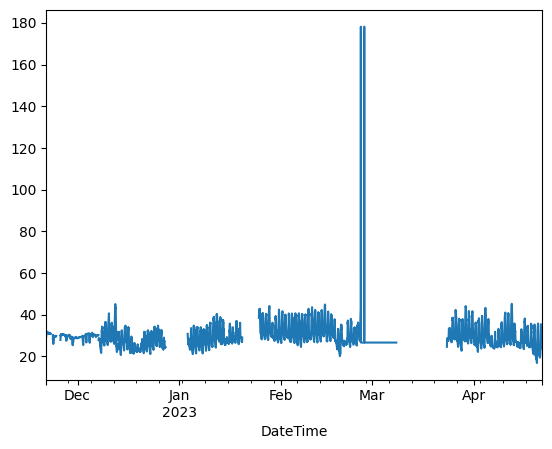

In [10]:
chamber_temp_data.sensor_dataframe['measuring'].plot()

### Plot Valid Data

<Axes: xlabel='DateTime'>

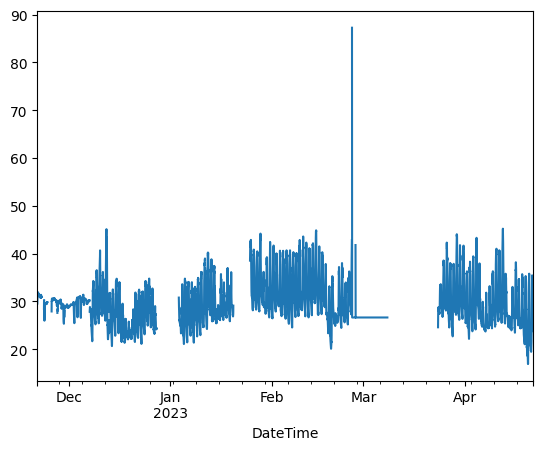

In [11]:
chamber_temp_data.sensor_dataframe[chamber_temp_data.sensor_dataframe['Tag'] == 'VALID']['measuring'].resample('15T').mean().plot()

### Plot raw derivatives

<Axes: xlabel='DateTime'>

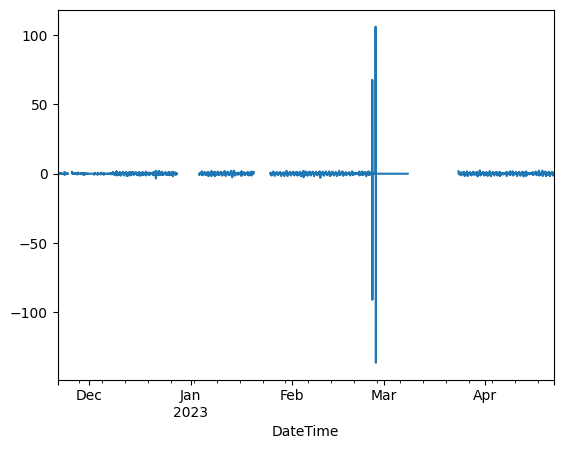

In [12]:
chamber_temp_data.sensor_dataframe['Diff'].resample('15T').mean().plot()

### Plot valid derivatives

<Axes: xlabel='DateTime'>

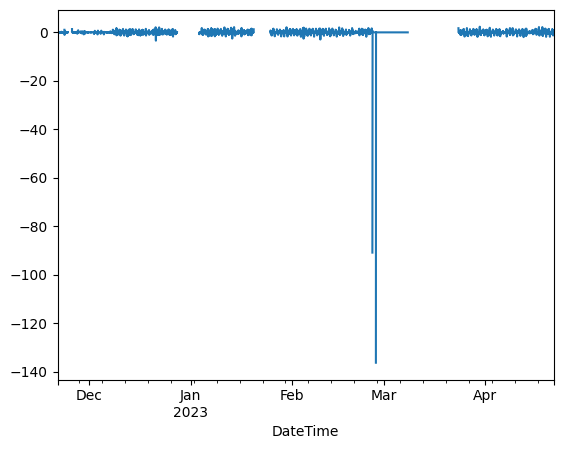

In [13]:
chamber_temp_data.valid_differential_series.resample('15T').mean().plot()

## Resampled data

In [14]:
chamber_temp_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag
DateTime,,,,,,,,,,
2022-11-21 10:30:00,-28.456899,-48.972999,29.5500,NaN,0.0,10,1,NaN,25.0,LOWSAMPLES
2022-11-21 11:30:00,-28.456899,-48.972999,30.6400,0.3600,0.0,11,4,0.367786,100.0,VALID
2022-11-21 12:30:00,-28.456899,-48.972999,31.3075,0.1125,0.0,12,4,0.128938,100.0,VALID
2022-11-21 13:30:00,-28.456899,-48.972999,31.5700,0.0475,0.0,13,4,0.053541,100.0,VALID
2022-11-21 14:30:00,-28.456899,-48.972999,31.6500,-0.0050,0.0,14,3,0.026458,75.0,VALID


### Data contabilization

In [15]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, chamber_temp_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,719,19.774477
VALID,2917,80.225523
TOTAL,3636,100.0


### Plot raw hourly data

<Axes: xlabel='DateTime'>

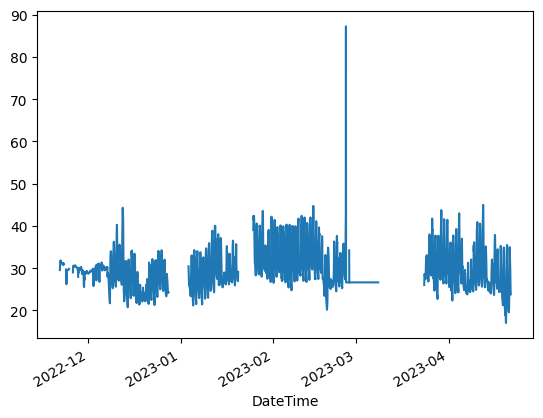

In [16]:
chamber_temp_data.sensor_dataframe_1hr['measuring'].plot()

### Plot valid hourly data

In [17]:
chamber_temp_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag
DateTime,,,,,,,,,,
2022-11-21 10:30:00,-28.456899,-48.972999,29.5500,NaN,0.0,10,1,NaN,25.0,LOWSAMPLES
2022-11-21 11:30:00,-28.456899,-48.972999,30.6400,0.3600,0.0,11,4,0.367786,100.0,VALID
2022-11-21 12:30:00,-28.456899,-48.972999,31.3075,0.1125,0.0,12,4,0.128938,100.0,VALID
2022-11-21 13:30:00,-28.456899,-48.972999,31.5700,0.0475,0.0,13,4,0.053541,100.0,VALID
2022-11-21 14:30:00,-28.456899,-48.972999,31.6500,-0.0050,0.0,14,3,0.026458,75.0,VALID


<Axes: xlabel='DateTime'>

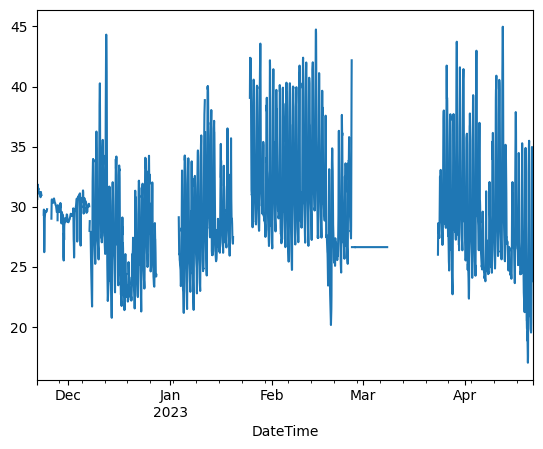

In [22]:
(chamber_temp_data.sensor_dataframe_1hr[chamber_temp_data.sensor_dataframe_1hr['Tag'] == 'VALID']
 .drop(columns='Tag').resample('H').mean()['measuring'].plot())

### Plot raw standard deviation

<Axes: xlabel='DateTime'>

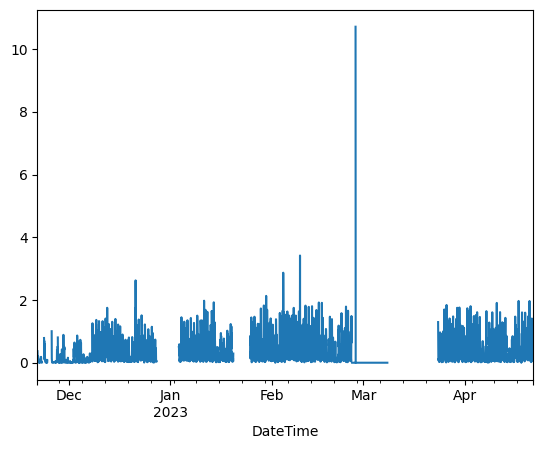

In [23]:
chamber_temp_data.sensor_dataframe_1hr['Std'].resample('H').mean().plot()

### Plot valid standard deviation

<Axes: xlabel='DateTime'>

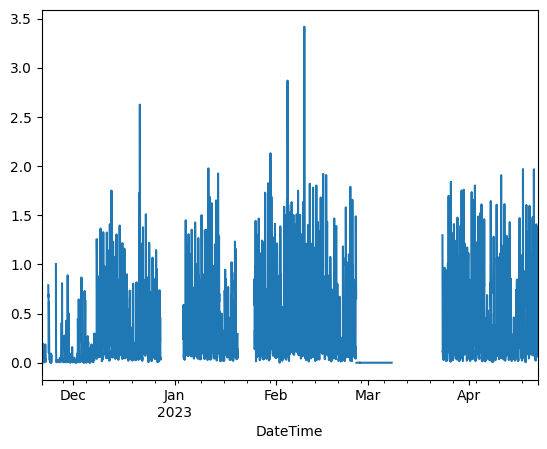

In [24]:
chamber_temp_data.sensor_dataframe_1hr[chamber_temp_data.sensor_dataframe_1hr['Tag'] == 'VALID']['Std'].resample('H').mean().plot()

## Calculate quantiles and tag data accordingly

### Calculate quantiles

In [25]:
chamber_temp_data.calculate_and_tag_quantiles()
chamber_temp_data.sensor_dataframe_1hr.head()

,latitude,longitude,measuring,Diff,value,Hour,Count,Std,% valid,Tag,GLOBAL_QTLE01,GLOBAL_QTLE99
DateTime,,,,,,,,,,,,
2022-11-21 10:30:00,-28.456899,-48.972999,29.5500,NaN,0.0,10,1,NaN,25.0,LOWSAMPLES,24.3675,40.3925
2022-11-21 11:30:00,-28.456899,-48.972999,30.6400,0.3600,0.0,11,4,0.367786,100.0,VALID,24.4525,42.3900
2022-11-21 12:30:00,-28.456899,-48.972999,31.3075,0.1125,0.0,12,4,0.128938,100.0,VALID,24.4200,44.2475
2022-11-21 13:30:00,-28.456899,-48.972999,31.5700,0.0475,0.0,13,4,0.053541,100.0,VALID,24.2550,44.3125
2022-11-21 14:30:00,-28.456899,-48.972999,31.6500,-0.0050,0.0,14,3,0.026458,75.0,VALID,23.9400,44.4075


In [26]:
tags = ['LOWSAMPLES','VALID', 'LTQTLE01', 'GTQTLE99']
data_contabilization = sensor_analysis.count_tags(tags, chamber_temp_data.sensor_dataframe_1hr)
data_contabilization

,#,%
LOWSAMPLES,719,19.774477
VALID,2821,77.585259
LTQTLE01,48,1.320132
GTQTLE99,48,1.320132
TOTAL,3636,100.0


## Process valid hourly data

In [27]:
valid_dataframe = (chamber_temp_data.sensor_dataframe_1hr[chamber_temp_data.sensor_dataframe_1hr['Tag'] == 'VALID']
                   .drop(columns=['Tag']).resample('H').mean())

### Plot mean vs. standard deviation for valid hourly data colored by valid percentage of valid samples

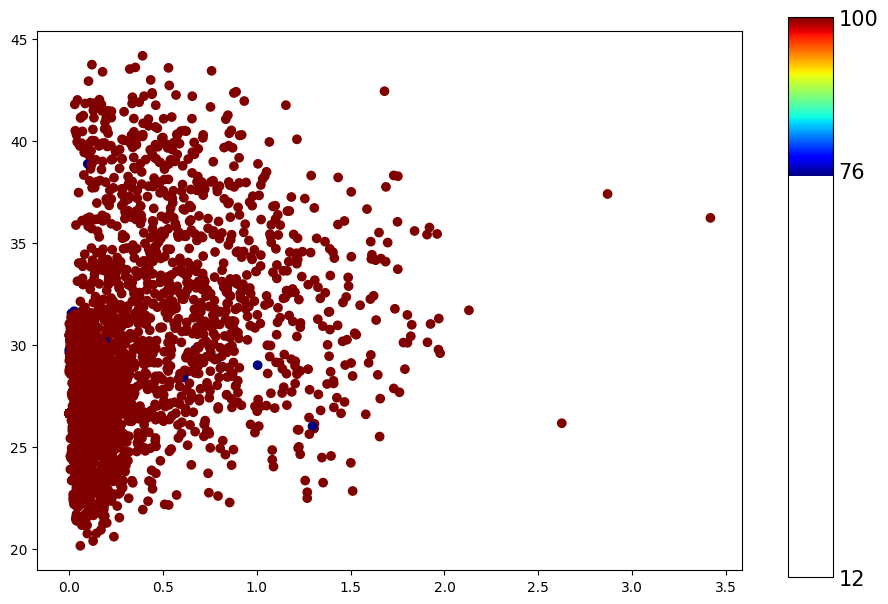

In [28]:
sensor_analysis.plot_mean_vs_std(valid_dataframe)

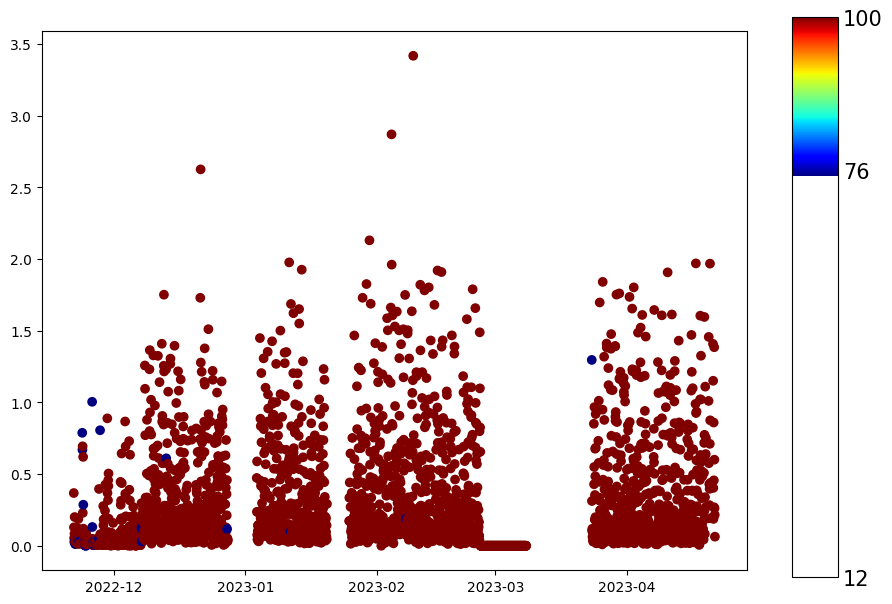

In [29]:
sensor_analysis.plot_std_in_time(valid_dataframe)

/Users/Fernando/Documents/Projects/Github/lcqar-low-cost-monit-proc/data-pre-processing/SensorDataAnalysisService.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Hour'].astype('int64')


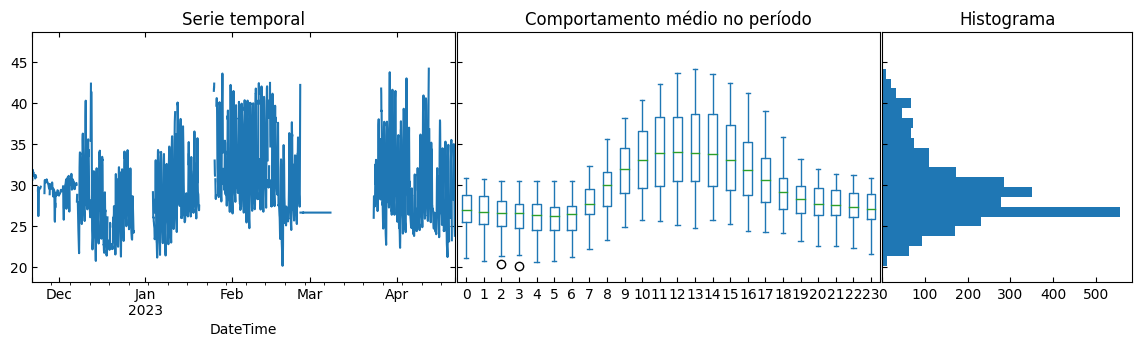

In [30]:
sensor_analysis.plot_box_hist(valid_dataframe, 20)

## Save Data

In [31]:
chamber_temp_data.save_to_csv()